# 数据分析（EDA）

### 该数据集包含球员和裁判之间的事情

### 分析这些数据中是否存在线性相关的数据

In [1]:
from __future__ import absolute_import, division, print_function
from matplotlib.pyplot import GridSpec
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

import time

%matplotlib inline
%config InlineBackend.figure_format='retina'

## 数据简介：

> 数据包含球员和裁判的信息，2012-2013年的比赛数据，总共设计球员2053名，裁判3147名，特征列表如下：



| Variable Name: | Variable Description: | 
| -- | -- | 
| playerShort | short player ID | 
| player | player name | 
| club | player club | 
| leagueCountry | country of player club (England, Germany, France, and Spain) | 
| height | player height (in cm) | 
| weight | player weight (in kg) | 
| position | player position | 
| games | number of games in the player-referee dyad | 
| goals | number of goals in the player-referee dyad | 
| yellowCards | number of yellow cards player received from the referee | 
| yellowReds | number of yellow-red cards player received from the referee | 
| redCards | number of red cards player received from the referee | 
| photoID | ID of player photo (if available) | 
| rater1 | skin rating of photo by rater 1 | 
| rater2 | skin rating of photo by rater 2 | 
| refNum | unique referee ID number (referee name removed for anonymizing purposes) | 
| refCountry | unique referee country ID number | 
| meanIAT | mean implicit bias score (using the race IAT) for referee country | 
| nIAT | sample size for race IAT in that particular country | 
| seIAT | standard error for mean estimate of race IAT   | 
| meanExp | mean explicit bias score (using a racial thermometer task) for referee country | 
| nExp | sample size for explicit bias in that particular country | 
| seExp |  standard error for mean estimate of explicit bias measure | 


In [129]:
df = pd.read_csv("redcard.csv")   #  读取数据

In [130]:
df.shape

(146028, 28)

In [131]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [5]:
df.describe().T        #对数据进行简单统计，并以原始数据的转置来查看

,count,mean,std,min,25%,50%,75%,max
height,145765.0,181.935938,6.738726,1.610000e+02,177.000000,182.000000,187.000000,2.030000e+02
weight,143785.0,76.075662,7.140906,5.400000e+01,71.000000,76.000000,81.000000,1.000000e+02
games,146028.0,2.921166,3.413633,1.000000e+00,1.000000,2.000000,3.000000,4.700000e+01
victories,146028.0,1.278344,1.790725,0.000000e+00,0.000000,1.000000,2.000000,2.900000e+01
ties,146028.0,0.708241,1.116793,0.000000e+00,0.000000,0.000000,1.000000,1.400000e+01
defeats,146028.0,0.934581,1.383059,0.000000e+00,0.000000,1.000000,1.000000,1.800000e+01
goals,146028.0,0.338058,0.906481,0.000000e+00,0.000000,0.000000,0.000000,2.300000e+01
yellowCards,146028.0,0.385364,0.795333,0.000000e+00,0.000000,0.000000,1.000000,1.400000e+01
yellowReds,146028.0,0.011381,0.107931,0.000000e+00,0.000000,0.000000,0.000000,3.000000e+00
redCards,146028.0,0.012559,0.112889,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00


In [6]:
df.dtypes     #查看各种指标的数据类型

playerShort       object
player            object
club              object
leagueCountry     object
birthday          object
height           float64
weight           float64
position          object
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID           object
rater1           float64
rater2           float64
refNum             int64
refCountry         int64
Alpha_3           object
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [7]:
all_columns = df.columns.tolist()        #查看所有列名（指标），并将其放入列表中 ，方便去掉没用的列
all_columns

['playerShort',
 'player',
 'club',
 'leagueCountry',
 'birthday',
 'height',
 'weight',
 'position',
 'games',
 'victories',
 'ties',
 'defeats',
 'goals',
 'yellowCards',
 'yellowReds',
 'redCards',
 'photoID',
 'rater1',
 'rater2',
 'refNum',
 'refCountry',
 'Alpha_3',
 'meanIAT',
 'nIAT',
 'seIAT',
 'meanExp',
 'nExp',
 'seExp']

In [8]:
df['height'].mean()       #计算运动员的平均身高

181.93593798236887

### 但是可能有的运动员在数据中出现了好几次，这样直接计算会导致结果不准确

In [9]:
np.mean(df.groupby('playerShort').height.mean())    #以 playerShort 为键对 height 分类，这样可以避免一个球员出现几次，计算结果更加准确

181.74372848007872

### 创建球员信息表

In [10]:
#统计出球员的所有信息进行建表，数据模块切分
player_index = 'playerShort'               # 表的索引
player_cols = [#'player',                  # 删除玩家姓名，因为使用playerShort作为唯一标识
               'birthday',
               'height',
               'weight',
               'position',
               'photoID',
               'rater1',
               'rater2',
               'goals'
              ]

In [11]:
# 查看数据内部是否存在问题
# 对数据进行 groupby 分组，查看数据是否存在重复值，使用 nunique 方法来判断每列数据是否有重复值
all_cols_unique_players = df.groupby('playerShort').agg({col:'nunique' for col in player_cols})


In [12]:
all_cols_unique_players.head()   # 每列数据出现 1 表示该值只出现了一次，如果出现了其它值则表示该值出现了好多次

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,
aaron-hughes,1,1,1,1,1,1,1,3
aaron-hunt,1,1,1,1,1,1,1,6
aaron-lennon,1,1,1,1,1,1,1,5
aaron-ramsey,1,1,1,1,1,1,1,4
abdelhamid-el-kaoutari,1,1,1,1,1,1,1,2


In [13]:
#对上面表中的所有数据进行判断，如果每个值出现的次数大于 1 则将其取掉
all_cols_unique_players[all_cols_unique_players > 1].dropna().head()

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,


In [14]:
#判断上面所有数据出现的次数大于 1 的个数是否等于 0 
#结果显示 True，表示当前所有数据都是唯一的
all_cols_unique_players[all_cols_unique_players > 1].dropna().shape[0] == 0

True

In [15]:
all_cols_unique_players

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,
aaron-hughes,1,1,1,1,1,1,1,3
aaron-hunt,1,1,1,1,1,1,1,6
aaron-lennon,1,1,1,1,1,1,1,5
aaron-ramsey,1,1,1,1,1,1,1,4
abdelhamid-el-kaoutari,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...
zoltan-stieber,1,1,1,1,1,1,1,4
zouheir-dhaouadi,1,1,1,0,0,0,0,4
zoumana-camara,1,1,1,1,1,1,1,2


In [16]:
#该函数是将上面判断表中所有数据是否唯一的所有步骤组合在一起
def get_subgroup(dataframe, g_index, g_columns):
    
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print("存在不唯一的值！")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

In [17]:
players = get_subgroup(df, player_index, player_cols)
players.head(8)

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,2
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,6
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,4
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,3
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,1
abdon-prats,17.12.1992,181.0,79.0,NaN,NaN,NaN,NaN,2
abdou-dampha,27.12.1991,184.0,74.0,Attacking Midfielder,NaN,NaN,NaN,1
abdou-traore_2,17.01.1988,180.0,74.0,Right Midfielder,102005.jpg,0.75,0.75,1


In [19]:
pd.DataFrame(players).to_csv("Players.csv", encoding="utf_8_sig")  # 将处理后的数据另存为Players.csv文件

In [97]:
players = pd.read_csv("Players.csv")
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


In [19]:
players.shape

(2053, 8)

In [20]:
players.describe()

,height,weight,rater1,rater2
count,2033.000000,1973.000000,1585.000000,1585.00000
mean,181.743728,75.639635,0.268612,0.31041
std,6.690114,7.101795,0.296578,0.29666
min,161.000000,54.000000,0.000000,0.00000
25%,177.000000,71.000000,0.000000,0.00000
50%,182.000000,75.000000,0.250000,0.25000
75%,186.000000,80.000000,0.500000,0.50000
max,203.000000,100.000000,1.000000,1.00000


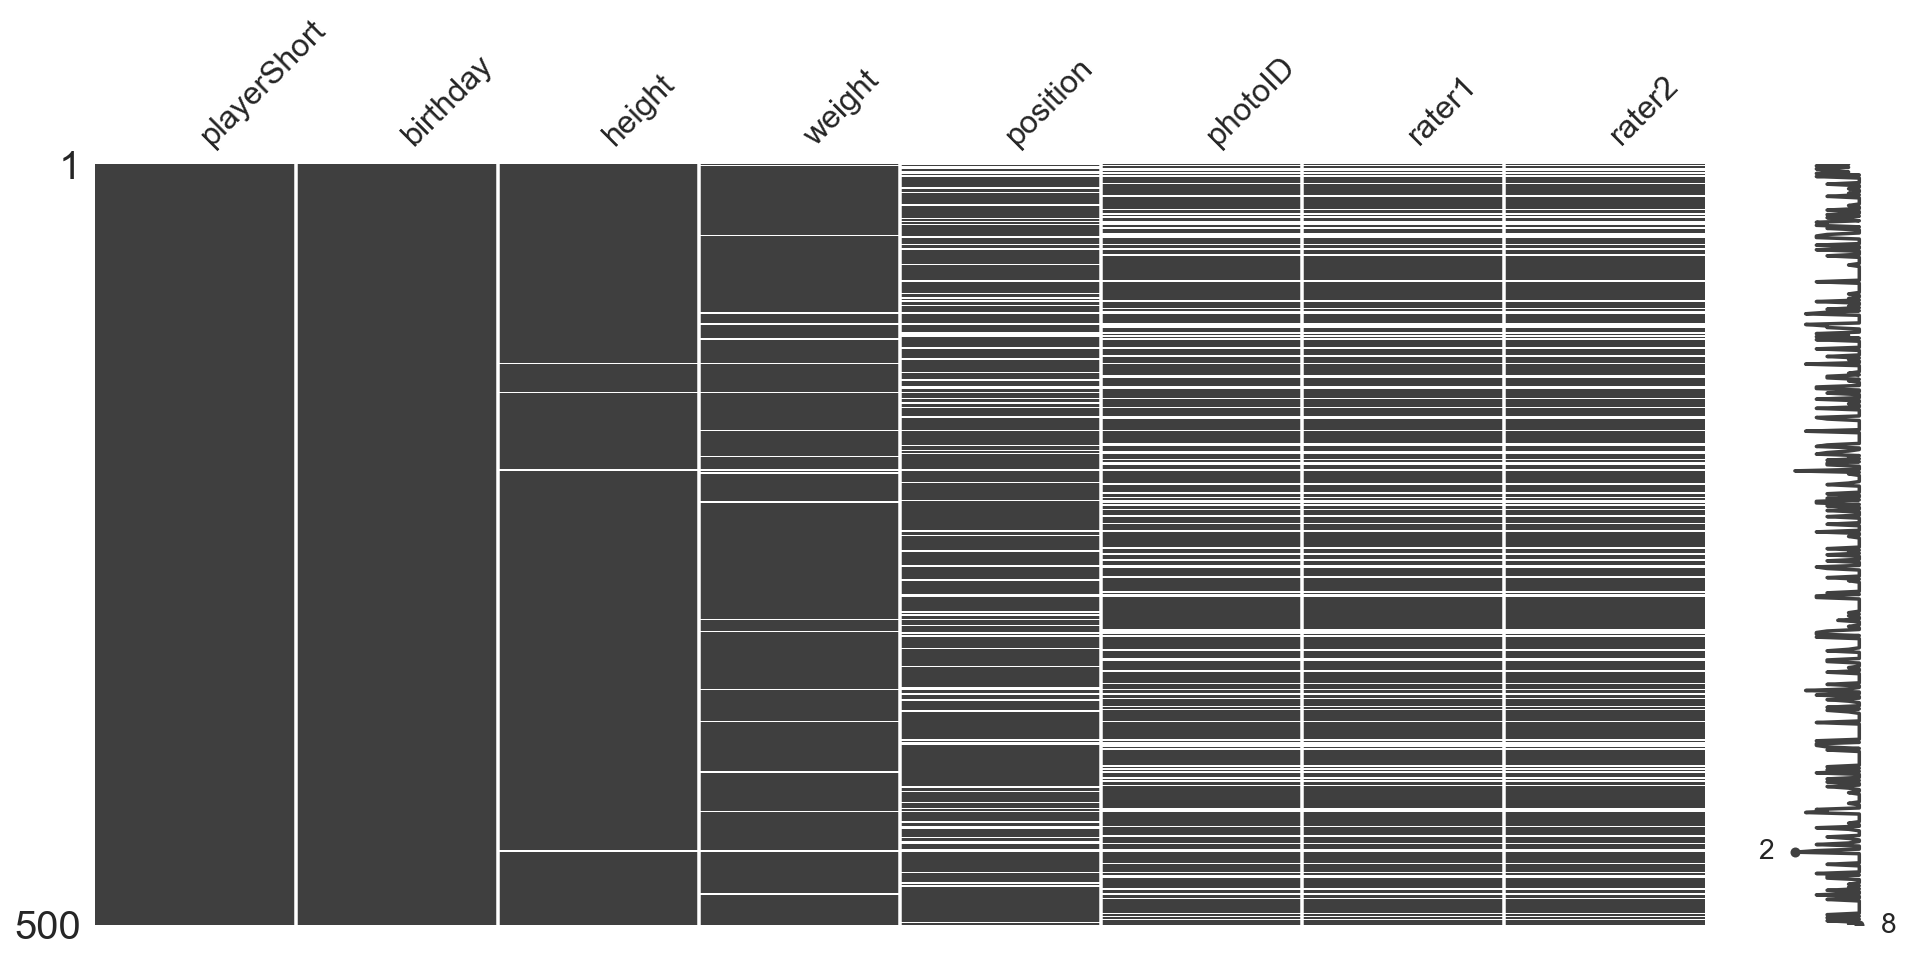

In [21]:
#对数据进行抽样，看一下抽样样本中的缺失值
#下图就是对缺失值的统计，纯色表示没有缺失值
msno.matrix(players.sample(500),   #从数据中提取500个样本
            figsize=(16, 7),
            width_ratios=(15, 1))

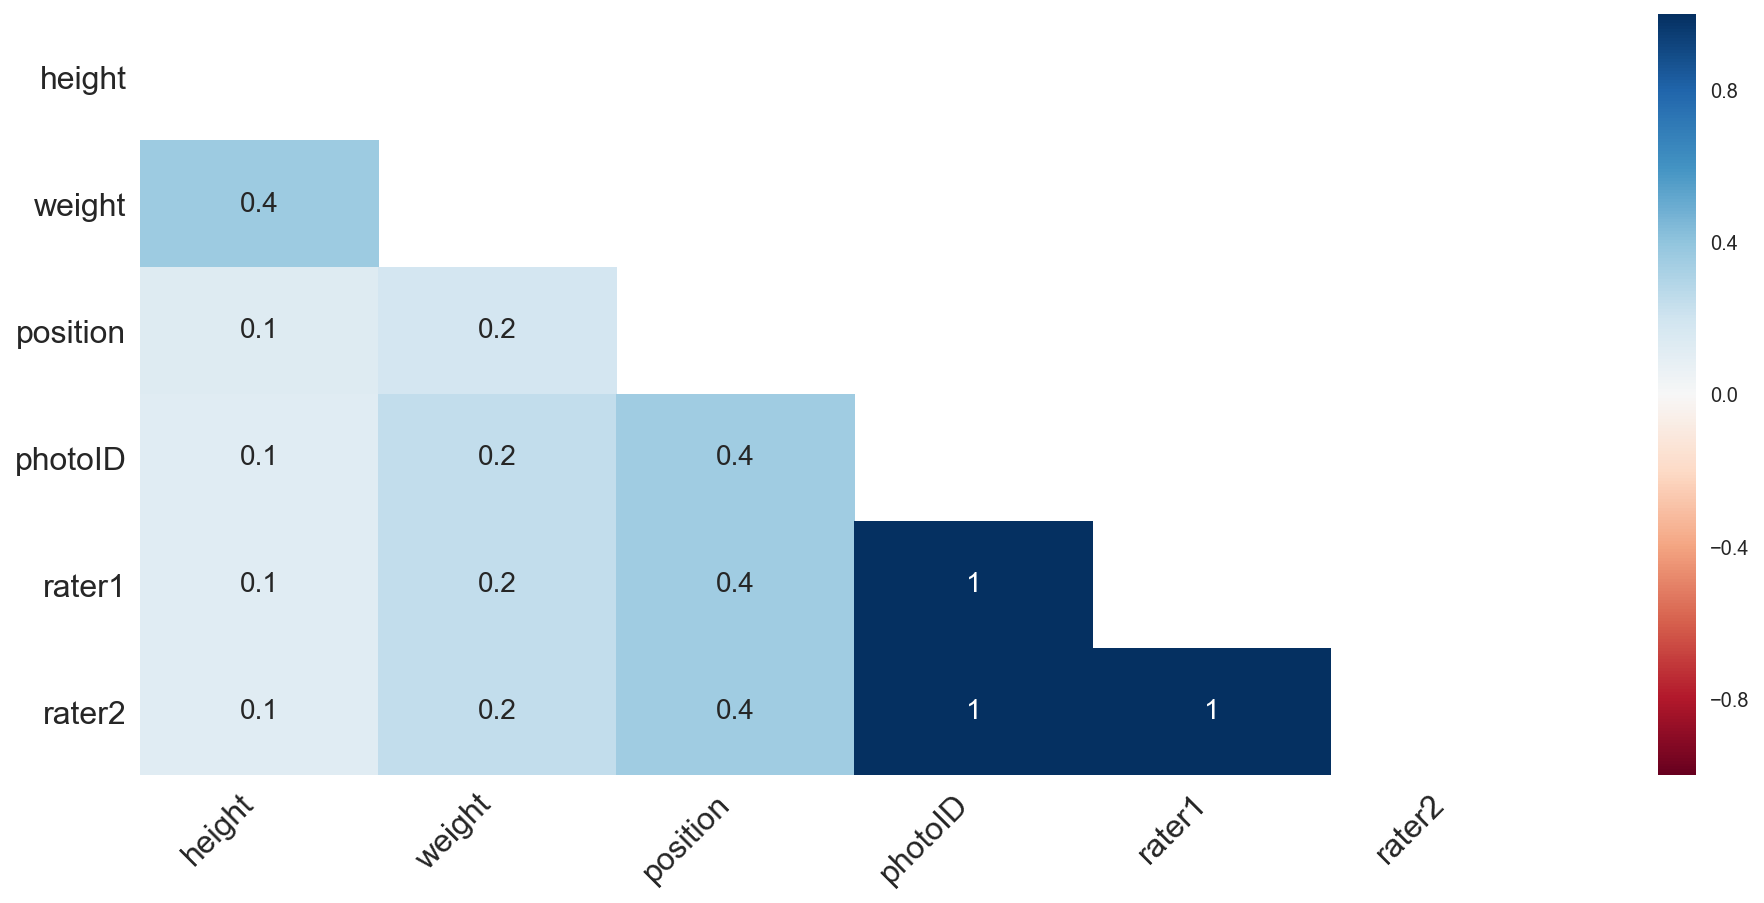

In [22]:
#绘制热度图，表示左边指标缺失，上面指标缺失的概率
msno.heatmap(players.sample(500),
            figsize=(16, 7),)

### 统计缺失值的个数

In [23]:
print("All players:", len(players))
print("rater1 nulls:", len(players[(players.rater1.isnull())]))
print("rater2 nulls:", len(players[players.rater2.isnull()]))
print("Both nulls:", len(players[(players.rater1.isnull()) & (players.rater2.isnull())]))

All players: 2053
rater1 nulls: 468
rater2 nulls: 468
Both nulls: 468


In [24]:
# modifying dataframe 统计非空值个数，去掉rate1 中的缺失值
players = players[players.rater1.notnull()]
players.shape[0]

1585

In [25]:
2053-1585

468

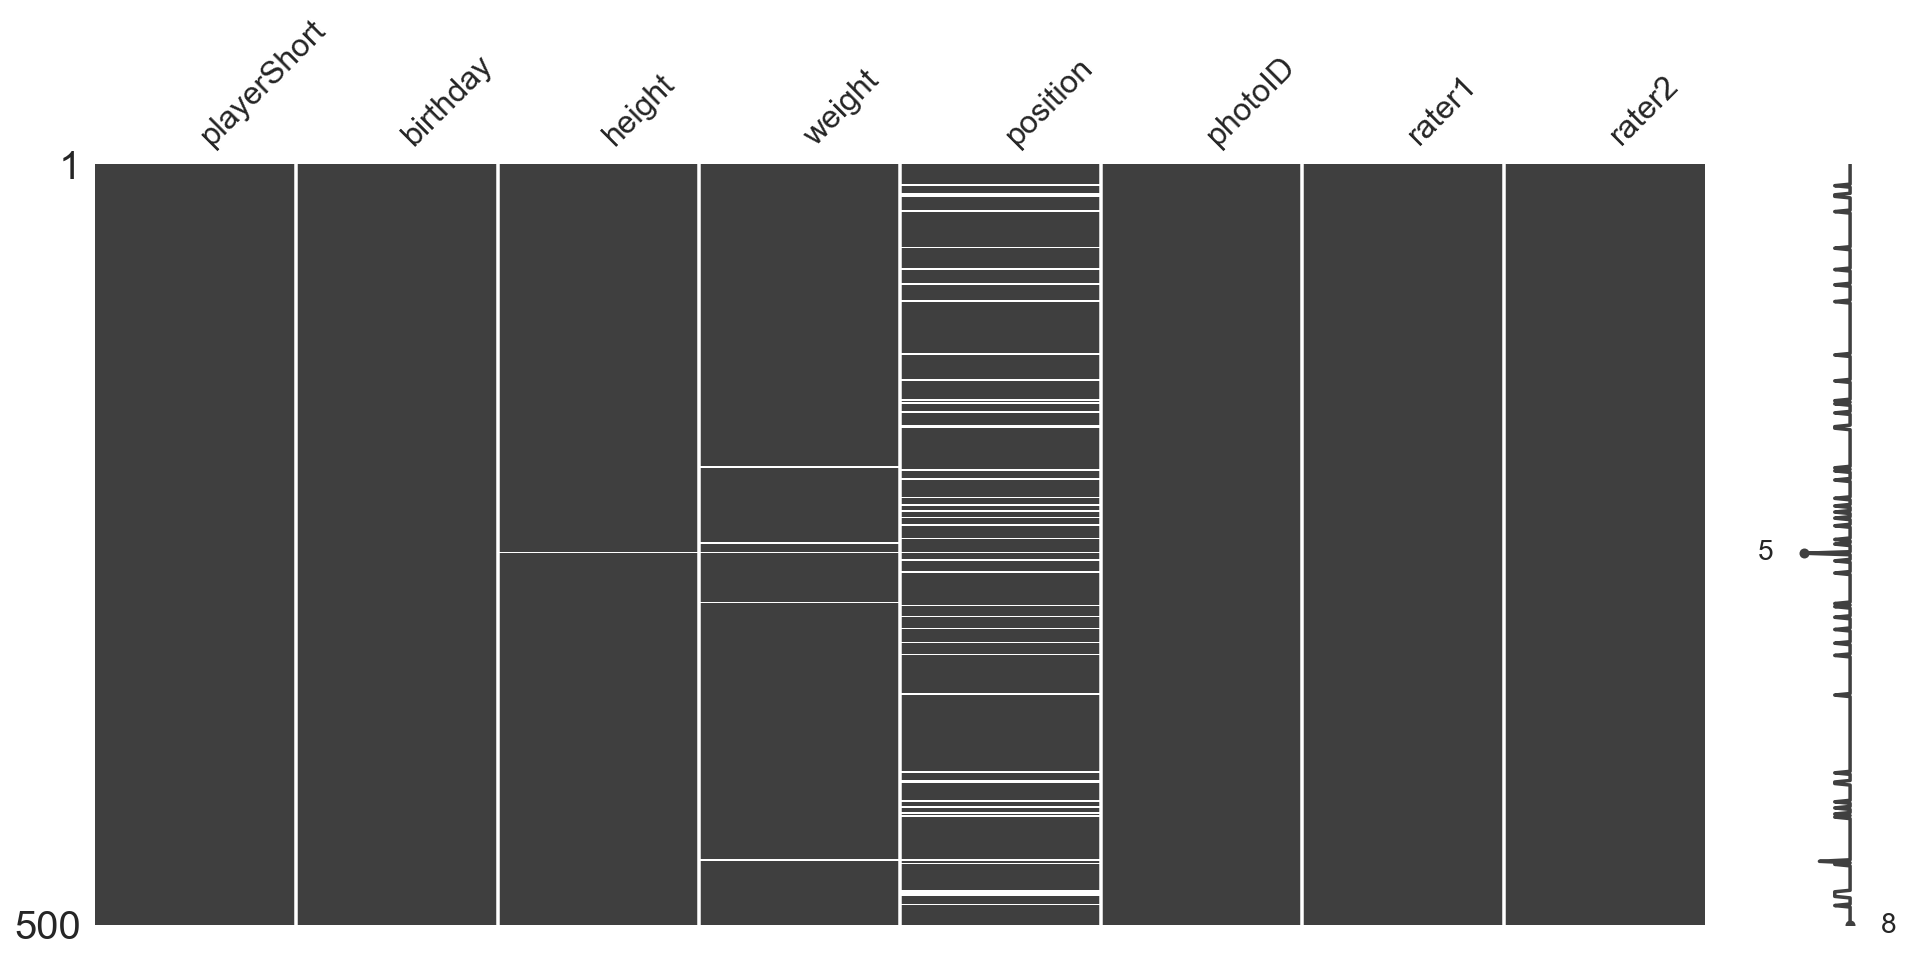

In [26]:
#去掉较多的缺失值
msno.matrix(players.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

### rate1和rate2看起来比较类似，对它们的相似性进行比较

In [27]:
pd.crosstab(players.rater1, players.rater2)
# crosstab 函数可以针对指定的两个指标进行绘制表格
#当取值越靠近对角线时表示两种指标的评估准则越类似，即线性相关

#当需要对两个类似指标进行比较时，可以使用 pandas 中的 crosstab 来
#绘制这两种指标的表格

rater2,0.00,0.25,0.50,0.75,1.00
rater1,,,,,
0.00,424,200,2,0,0
0.25,27,470,54,0,0
0.50,0,23,116,31,0
0.75,0,0,2,104,34
1.00,0,0,0,6,92


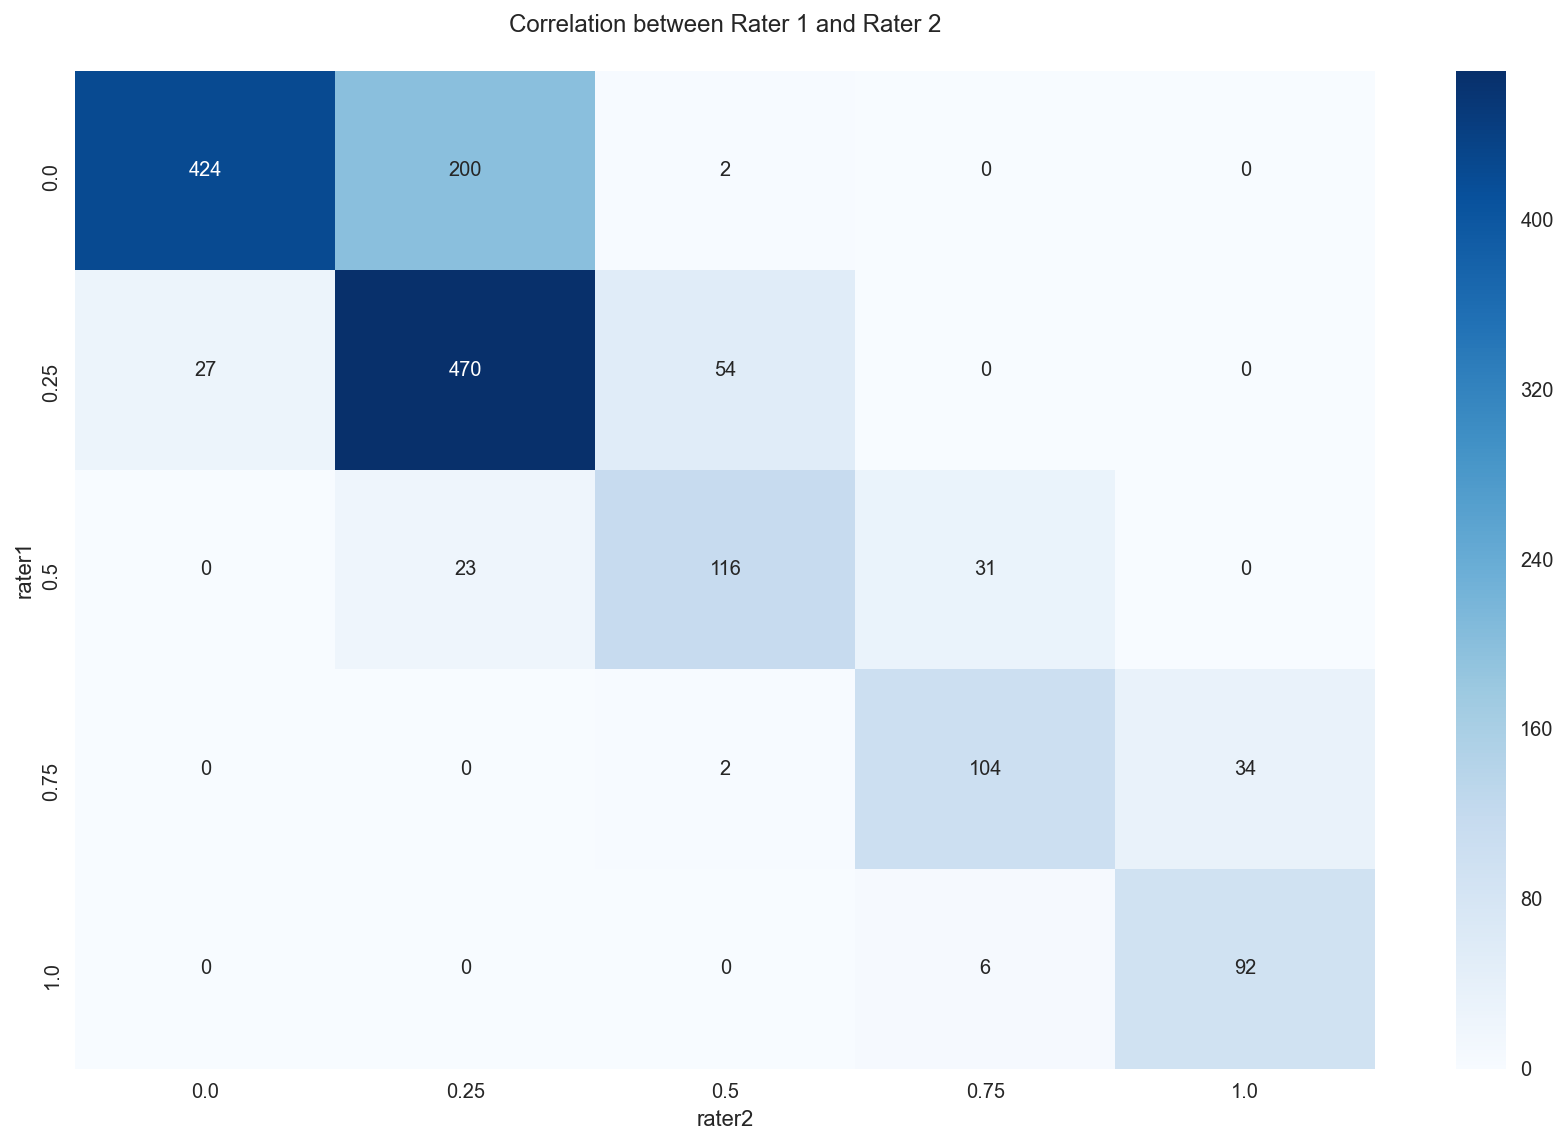

In [28]:
#使用热度图来表示上面生成的表格

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(players.rater1, players.rater2), cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_title("Correlation between Rater 1 and Rater 2\n")
fig.tight_layout()

### 可以看出rate1和rate2的相似性很高，可以新加一列这两个指标的平均值

In [29]:
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


In [30]:
players['skintone'] = players[['rater1', 'rater2']].mean(axis=1) # 新增加一列表示两个指标的平均值即肤色值
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2,skintone
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250


## Positions  球员的位置单变量分析

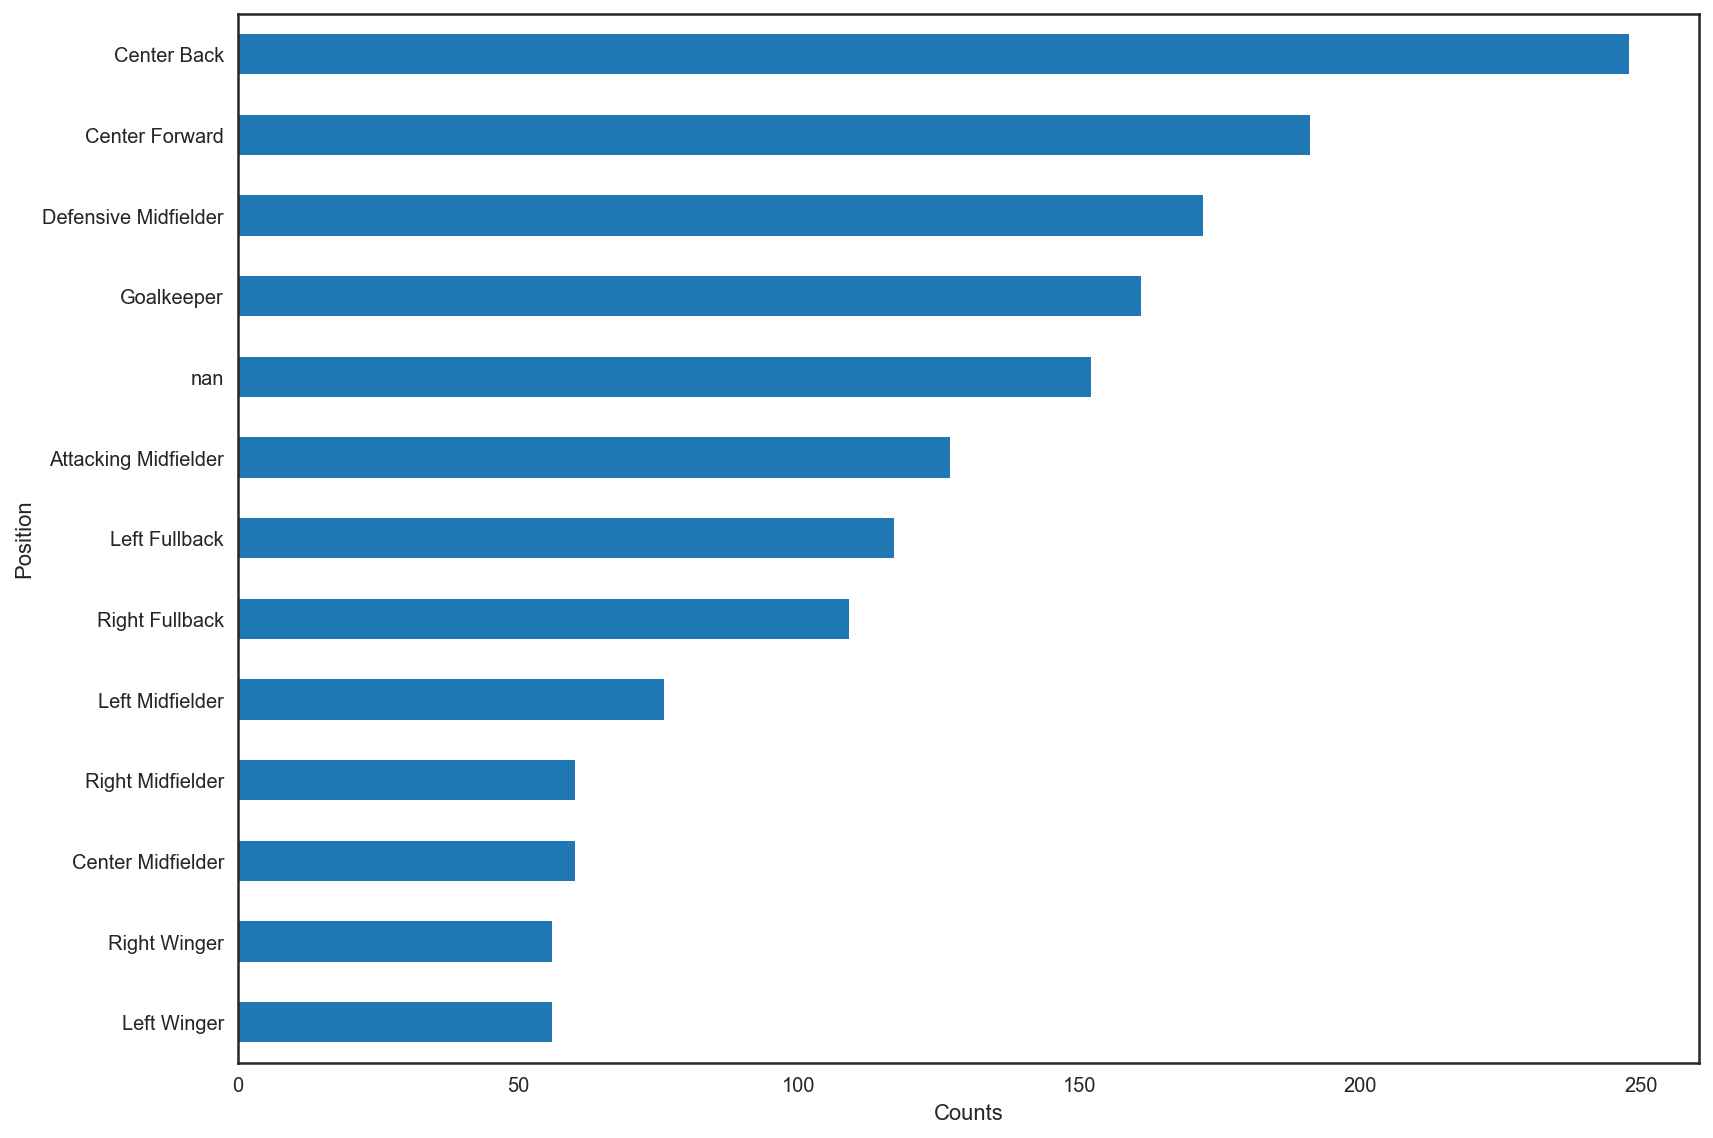

In [31]:
# 展示球员踢球的所有位置
MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
players.position.value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)#按不同位置的个数进行升序排列
ax.set_ylabel("Position")
ax.set_xlabel("Counts")
fig.tight_layout()

In [32]:
# 进行数据合并
# 后卫
defense = ['Center Back','Defensive Midfielder', 'Left Fullback', 'Right Fullback', ]
# 中场
midfield = ['Right Midfielder', 'Center Midfielder', 'Left Midfielder',]
# 前锋
forward = ['Attacking Midfielder', 'Left Winger', 'Right Winger', 'Center Forward']
# 守门员
keeper = 'Goalkeeper'

# 提取 position 列中四个位置的球员信息，并添加标签 'position_agg' 
players.loc[players['position'].isin(defense), 'position_agg'] = "Defense"       
players.loc[players['position'].isin(midfield), 'position_agg'] = "Midfield"
players.loc[players['position'].isin(forward), 'position_agg'] = "Forward"
players.loc[players['position'].eq(keeper), 'position_agg'] = "Keeper"

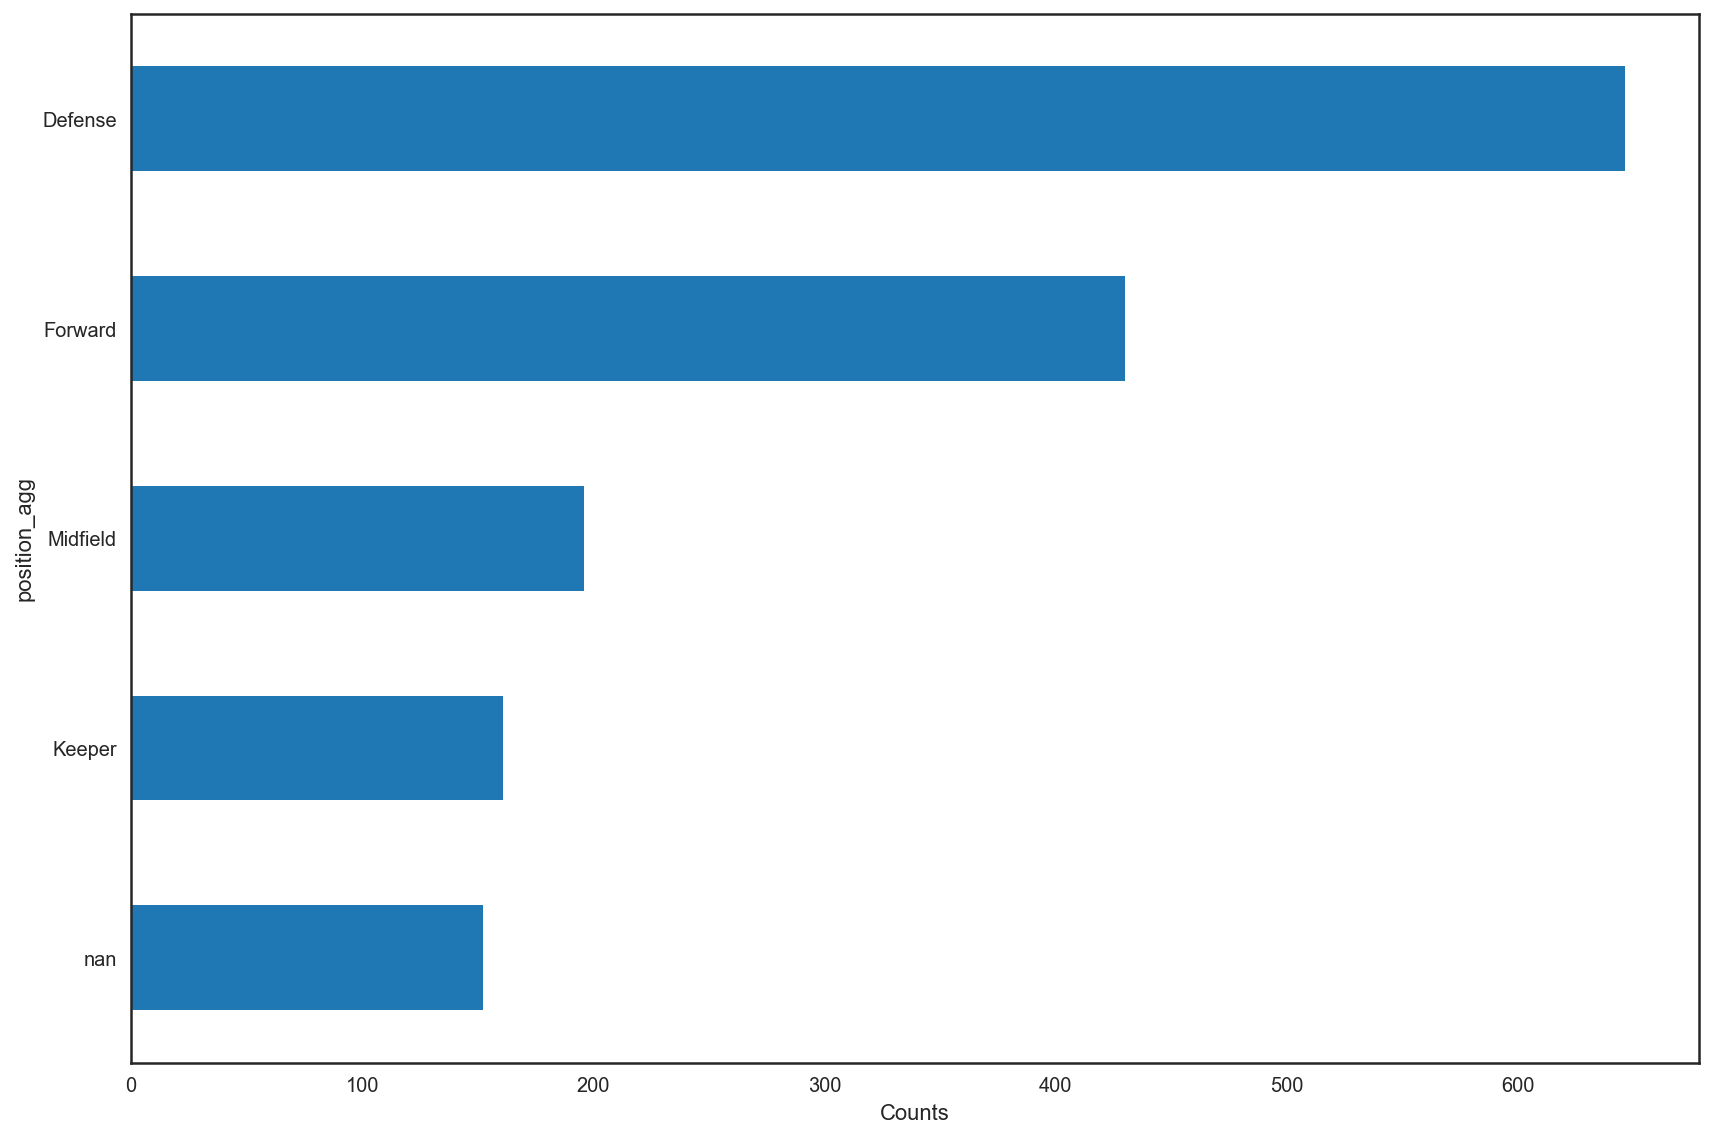

In [33]:
#将合并后的数据进行绘制
MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
players['position_agg'].value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)#以升序排列四个位置的球员数量
ax.set_ylabel("position_agg")
ax.set_xlabel("Counts")
fig.tight_layout()

### 多变量之间的分析

In [34]:
from pandas.plotting import scatter_matrix   # scatter_matrix 库可以绘制多变量之间的关系图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BCA95F3A90>,
      dtype=object)

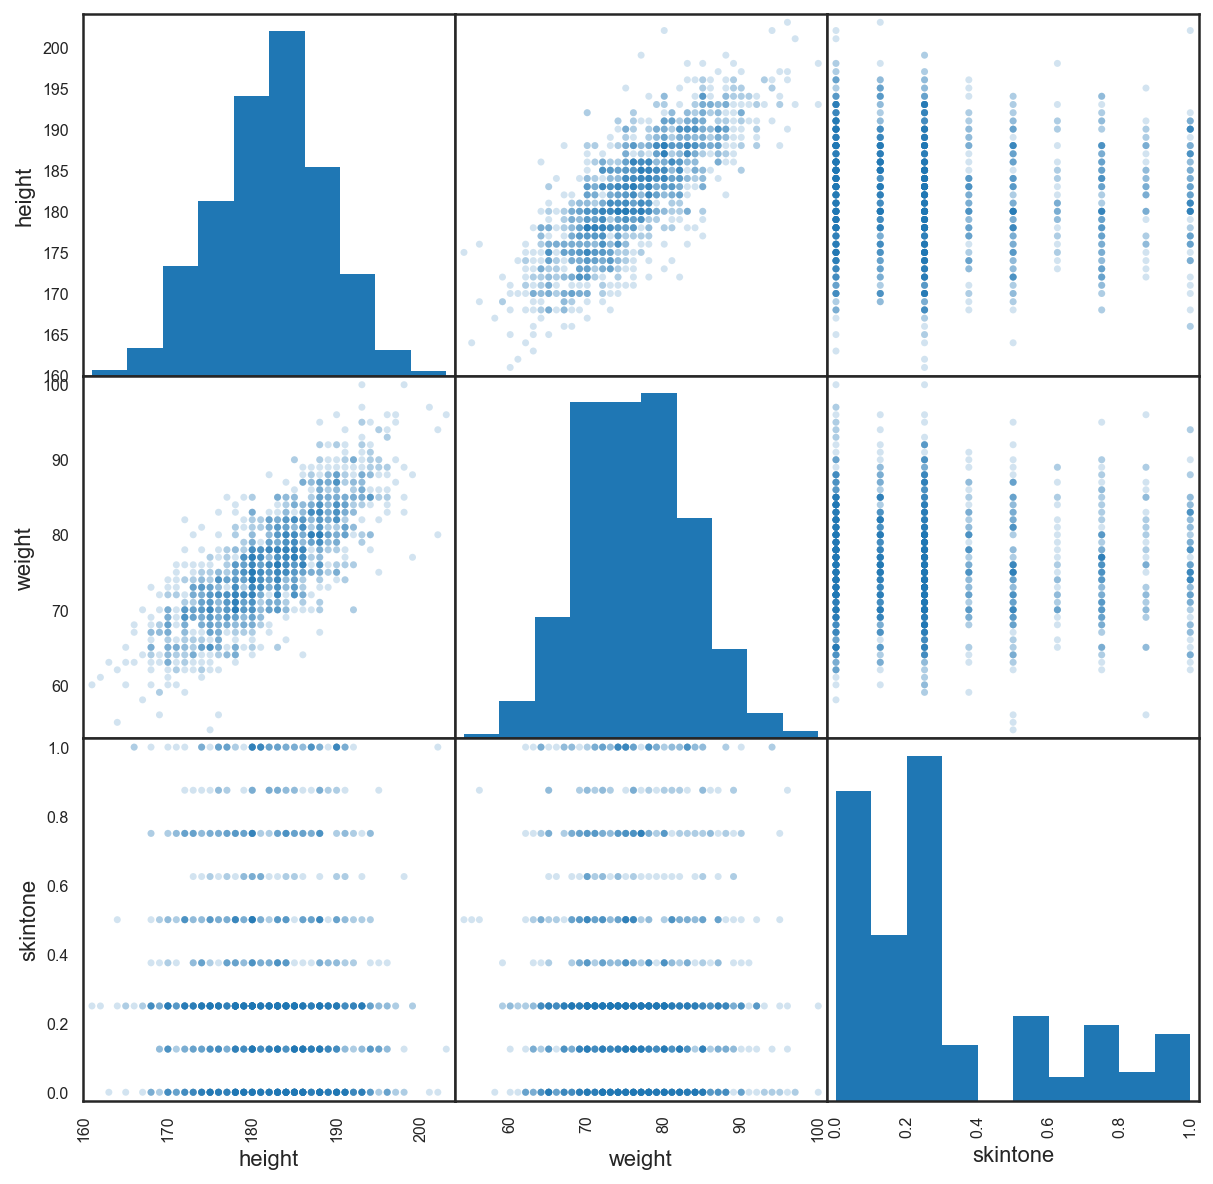

In [35]:
#分别统计 身高、肤色、体重两两之间的关系
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(players[['height', 'weight', 'skintone']], alpha=0.2, diagonal='hist', ax=ax)
#散点图中的点分布在对角线上表示两种指标之间有线性关系

### 从图中可以看出体重和身高之间具有线性关系，随着身高的增加体重也在增加

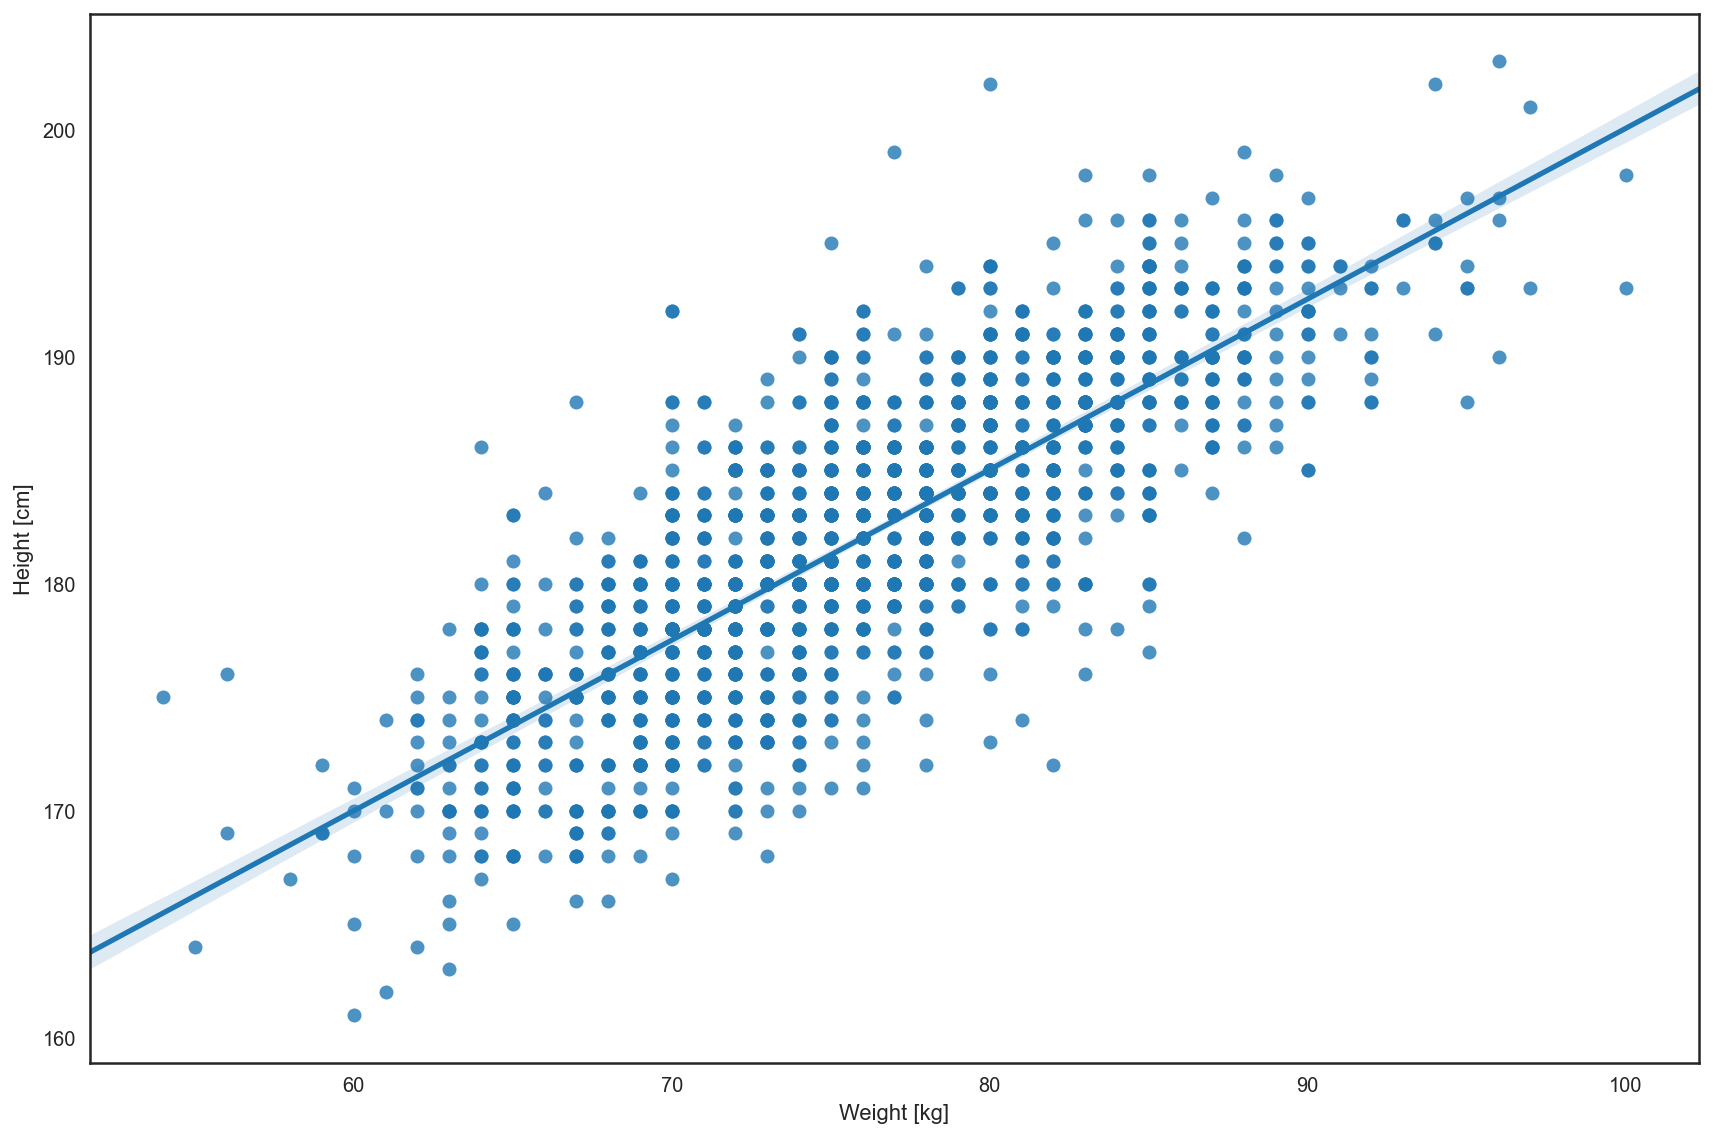

In [36]:
#绘制身高和体重之间的关系图
fig, ax = plt.subplots(figsize=MIDSIZE)
sns.regplot('weight', 'height', data=players, ax=ax)
ax.set_ylabel("Height [cm]")
ax.set_xlabel("Weight [kg]")
fig.tight_layout()

### 对身高和体重进行分段

In [37]:
#先定义体重的级别
weight_categories = ["vlow_weight",
                     "low_weight",
                     "mid_weight",
                     "high_weight",
                     "vhigh_weight",
                    ]

players['weightclass'] = pd.qcut(players['weight'],        #切分的数据
                                 len(weight_categories),   #切分的份数
                                 weight_categories)        #切分后所属的类别(标签)
# pd.qcut 函数对数据进行切分

In [38]:
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight


In [39]:
#对身高进行分段
height_categories = ["vlow_height",
                     "low_height",
                     "mid_height",
                     "high_height",
                     "vhigh_height",
                    ]

players['heightclass'] = pd.qcut(players['height'],           #切分的数据
                                 len(height_categories),      #切分的份数
                                 height_categories)           #切分后所属的类别(标签)


In [40]:
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass,heightclass
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight,mid_height
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight,mid_height
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight,vlow_height
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight,low_height
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight,low_height


In [41]:
players['heightclass'].value_counts()    #分类查看各种身高的个数

vlow_height     344
low_height      329
mid_height      319
high_height     317
vhigh_height    273
Name: heightclass, dtype: int64

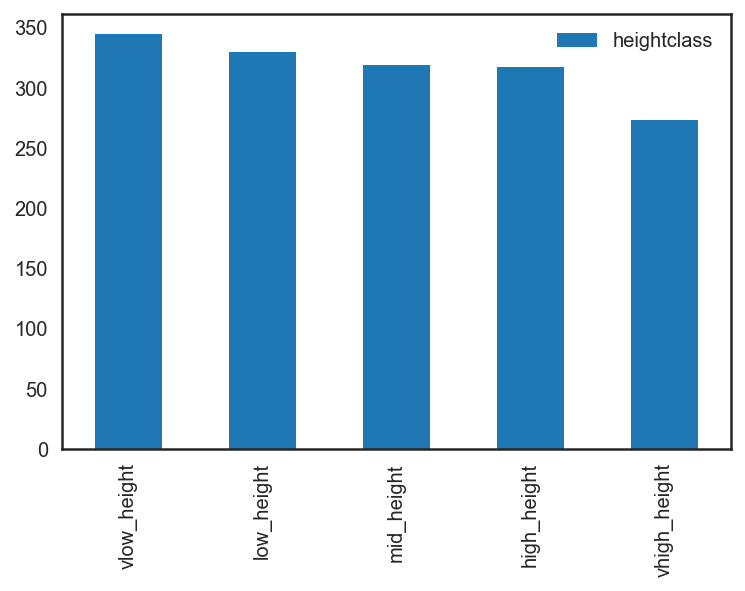

In [42]:
height = players['heightclass'].value_counts()  #绘制身高分布条形图
date = pd.DataFrame(height)
date.plot(kind='bar')

In [43]:
players['weightclass'].value_counts()

vlow_weight     361
mid_weight      349
low_weight      311
vhigh_weight    293
high_weight     250
Name: weightclass, dtype: int64

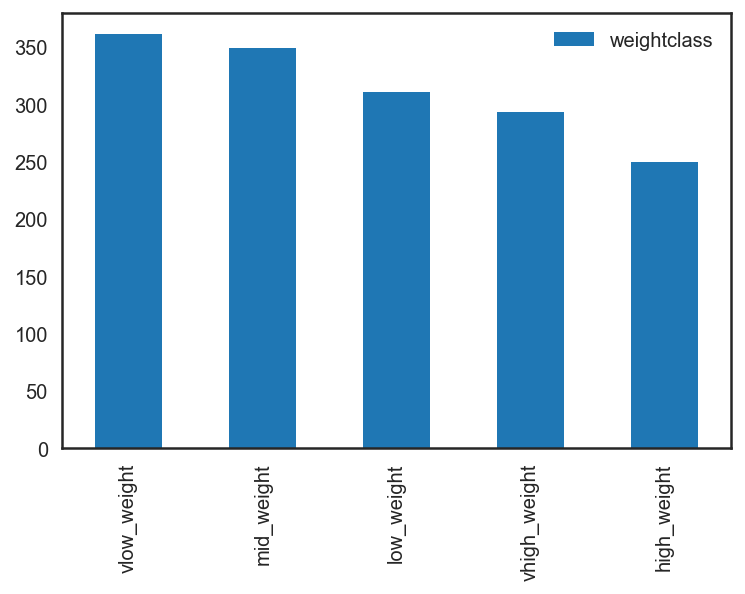

In [44]:
weight = players['weightclass'].value_counts()      #绘制体重分布条形图
date = pd.DataFrame(weight)
date.plot(kind='bar')

In [77]:
pandas_profiling.ProfileReport(players).to_file('report.html') #调用pandas_profiling库对整个数据集进行分析

### 创建球员和裁判的数据表

In [100]:
dyad_index = ['refNum', 'playerShort']        # 设置索引
dyad_cols = ['games',                         # 设置列名
             'victories',
             'ties',
             'defeats',
             'goals',
             'yellowCards',
             'yellowReds',
             'redCards',
             'rater1',
             'rater2'
            ]

In [101]:
dyads = get_subgroup(df, g_index=dyad_index, g_columns=dyad_cols)       # 调用之前的函数去掉重复值

In [102]:
dyads.head()

games  victories  ties  defeats  goals  yellowCards  \
refNum playerShort                                                          
1      lucas-wilchez      1          0     0        1      0            0   
2      john-utaka         1          0     0        1      0            1   
3      abdon-prats        1          0     1        0      0            1   
       pablo-mari         1          1     0        0      0            0   
       ruben-pena         1          1     0        0      0            0   

                      yellowReds  redCards  rater1  rater2  
refNum playerShort                                          
1      lucas-wilchez           0         0    0.25    0.50  
2      john-utaka              0         0    0.75    0.75  
3      abdon-prats             0         0     NaN     NaN  
       pablo-mari              0         0     NaN     NaN  
       ruben-pena              0         0     NaN     NaN

In [103]:
dyads = dyads[dyads.rater1.notnull()]

In [110]:
dyads['skintone'] = dyads[['rater1', 'rater2']].mean(axis=1) # 新增加一列表示两个指标的平均值即肤色值
dyads.head()

games  victories  ties  defeats  goals  \
refNum playerShort                                                  
1      lucas-wilchez           1          0     0        1      0   
2      john-utaka              1          0     0        1      0   
4      aaron-hughes            1          0     0        1      0   
       aleksandar-kolarov      1          1     0        0      0   
       alexander-tettey        1          0     0        1      0   

                           yellowCards  yellowReds  redCards  rater1  rater2  \
refNum playerShort                                                             
1      lucas-wilchez                 0           0         0    0.25    0.50   
2      john-utaka                    1           0         0    0.75    0.75   
4      aaron-hughes                  0           0         0    0.25    0.00   
       aleksandar-kolarov            0           0         0    0.00    0.25   
       alexander-tettey              0           0         0    1.00    1.00   

                           skintone  
refNum playerShort                   
1      lucas-wilchez          0.375  
2      john-utaka             0.750  
4      aaron-hughes           0.125  
       aleksandar-kolarov     0.125  
       alexander-tettey       1.000

In [111]:
dyads.shape

(124621, 11)

In [112]:
dyads[dyads.redCards > 1].head(10)  # 查看那些球员的红牌数大于 1 

games  victories  ties  defeats  goals  yellowCards  \
refNum playerShort                                                              
140    bodipo                 6          2     1        3      1            0   
367    antonio-lopez_2        8          5     2        1      0            2   
432    javi-martinez         14          4     3        7      2            2   
       jonas                  9          1     4        4      1            0   
487    phil-jagielka          7          2     1        4      1            0   
586    cyril-jeunechamp      14          8     0        6      0            6   
804    sergio-ramos          18         12     1        5      4            6   
985    aly-cissokho           9          1     5        3      1            1   
1114   eugen-polanski         8          4     0        4      0            0   
1214   emmanuel-adebayor     23          9     7        7     10            4   

                          yellowReds  redCards  rater1  rater2  skintone  
refNum playerShort                                                        
140    bodipo                      0         2    0.50    0.25     0.375  
367    antonio-lopez_2             0         2    0.25    0.25     0.250  
432    javi-martinez               0         2    0.00    0.00     0.000  
       jonas                       0         2    0.25    0.25     0.250  
487    phil-jagielka               0         2    0.25    0.25     0.250  
586    cyril-jeunechamp            0         2    0.00    0.00     0.000  
804    sergio-ramos                1         2    0.00    0.00     0.000  
985    aly-cissokho                0         2    1.00    1.00     1.000  
1114   eugen-polanski              0         2    0.00    0.00     0.000  
1214   emmanuel-adebayor           1         2    1.00    1.00     1.000

In [113]:
pd.DataFrame(dyads).to_csv("dyads.csv", encoding="utf_8_sig")  # 将处理后的数据另存为Players.csv文件

In [114]:
agg_dyads = pd.read_csv("dyads.csv")
agg_dyads.head(10)

,refNum,playerShort,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,skintone
0,1,lucas-wilchez,1,0,0,1,0,0,0,0,0.25,0.50,0.375
1,2,john-utaka,1,0,0,1,0,1,0,0,0.75,0.75,0.750
2,4,aaron-hughes,1,0,0,1,0,0,0,0,0.25,0.00,0.125
3,4,aleksandar-kolarov,1,1,0,0,0,0,0,0,0.00,0.25,0.125
4,4,alexander-tettey,1,0,0,1,0,0,0,0,1.00,1.00,1.000
5,4,anders-lindegaard,1,0,1,0,0,0,0,0,0.25,0.25,0.250
6,4,andreas-beck,1,1,0,0,0,0,0,0,0.00,0.00,0.000
7,4,antonio-rukavina,2,2,0,0,0,1,0,0,0.00,0.00,0.000
8,4,ashkan-dejagah,1,1,0,0,0,0,0,0,0.50,0.50,0.500
9,4,benedikt-hoewedes,1,1,0,0,0,0,0,0,0.00,0.00,0.000


In [115]:
agg_dyads['totalRedCards'] = agg_dyads['yellowReds'] + agg_dyads['redCards']       # 将黄牌和红牌的数量进行汇总
agg_dyads.rename(columns={'redCards': 'strictRedCards'}, inplace=True)

In [116]:
agg_dyads.head()

,refNum,playerShort,games,victories,ties,defeats,goals,yellowCards,yellowReds,strictRedCards,rater1,rater2,skintone,totalRedCards
0,1,lucas-wilchez,1,0,0,1,0,0,0,0,0.25,0.50,0.375,0
1,2,john-utaka,1,0,0,1,0,1,0,0,0.75,0.75,0.750,0
2,4,aaron-hughes,1,0,0,1,0,0,0,0,0.25,0.00,0.125,0
3,4,aleksandar-kolarov,1,1,0,0,0,0,0,0,0.00,0.25,0.125,0
4,4,alexander-tettey,1,0,0,1,0,0,0,0,1.00,1.00,1.000,0


In [118]:
colus = ['refNum','playerShort','totalRedCards','skintone']
agg_dyads2 = agg_dyads[colus]
agg_dyads2

,refNum,playerShort,totalRedCards,skintone
0,1,lucas-wilchez,0,0.375
1,2,john-utaka,0,0.750
2,4,aaron-hughes,0,0.125
3,4,aleksandar-kolarov,0,0.125
4,4,alexander-tettey,0,1.000
...,...,...,...,...
124616,3147,tomas-rosicky,0,0.000
124617,3147,winston-reid,0,0.375
124618,3147,xherdan-shaqiri,0,0.250
124619,3147,yassine-el-ghanassi,0,0.500


In [119]:
agg_dyads3 = agg_dyads2.reset_index().set_index(['refNum','playerShort'])#同时以 refNum 和 playerShort 为索引
agg_dyads4 = agg_dyads3.drop(['index'], axis=1)
agg_dyads4

totalRedCards  skintone
refNum playerShort                                 
1      lucas-wilchez                    0     0.375
2      john-utaka                       0     0.750
4      aaron-hughes                     0     0.125
       aleksandar-kolarov               0     0.125
       alexander-tettey                 0     1.000
...                                   ...       ...
3147   tomas-rosicky                    0     0.000
       winston-reid                     0     0.375
       xherdan-shaqiri                  0     0.250
       yassine-el-ghanassi              0     0.500
       zdenk-pospch                     0     0.125

[124621 rows x 2 columns]

In [120]:
(agg_dyads4.groupby(level=0)      #以 refNum 为索引，统计出每个裁判所给的红牌和黄牌数
           .sum()
           .sort_values('totalRedCards', ascending=False)).head()#以降序排列 

,totalRedCards,skintone
refNum,,
468,49,139.500
432,49,121.250
449,47,184.250
916,42,137.875
2073,36,107.625


In [121]:
(agg_dyads4.groupby(level=1)        #以 playerShort 为索引，统计每个球员得到的红牌和黄牌总数
           .sum()
           .sort_values('totalRedCards', ascending=False)).head()

,totalRedCards,skintone
playerShort,,
cyril-jeunechamp,19,0.000
sergio-ramos,19,0.000
gary-medel,16,14.625
ballesteros,15,27.500
juanfran,15,56.625


In [122]:
b = pd.concat([agg_dyads4.sample(replace=True, n=10000).groupby('skintone').mean() 
                      for _ in range(100)])
#以肤色为键进行分组，分别计算每列数据的均值，循环执行100次

Text(0.5, 0, 'Skintone')

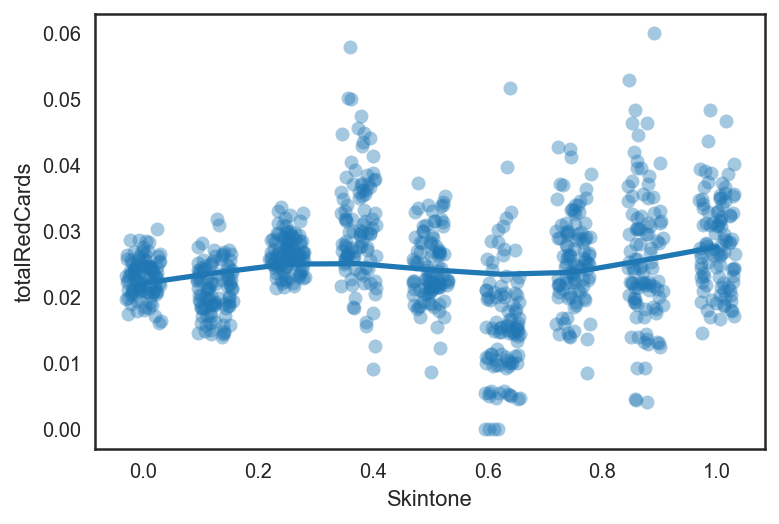

In [125]:
#绘制红牌、黄牌总数和球员肤色之间的关系图
ax = sns.regplot(b.index.values,
                 y='totalRedCards',
                 data=b,
                 lowess=True,
                 scatter_kws={'alpha':0.4,},
                 x_jitter=(0.125 / 4.0))
ax.set_xlabel("Skintone")

&#8194;&#8194;&#8194;&#8194;从图中可以看出当肤色值较小时，红、黄牌总数分布比较均匀，值比较小；当肤色值比较大时，红、黄牌总数分布比较分散，值相对较高。可以看出有的裁判较倾向于白人球员，对于肤色较深的球员有些歧视，如黑人。